In [1]:
from utils import ModelImporter, Preprocessing
import torch
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# Analize Model with the Public Test Data

In [2]:
#load data
pre = Preprocessing('fer2013')
pre.load_data(filename='test_public_norm.csv', name='test')

X_df = pre.get(name='test').drop(columns=['emotion'])
y_df = pre.get(name='test')['emotion']

In [20]:
dtype = torch.float
device = torch.device("cpu")

n_classes = 7
n_epochs = 100
learning_rate = 0.0001
batch_size = 32
#epoch_n=80# opmitized according to F1 score
epoch_n=50# opmitized according to val accuracy

model_name = f'cnn_simple_reduced_balanced_sampling_{learning_rate}_{batch_size}_{n_epochs}_{n_classes}_epoch{epoch_n}'

m_importer = ModelImporter('fer2013_reduced')

model = m_importer.load_nn_model(model_name)

['cnn_simple_reduced_balanced_sampling_0.0001_32_100_7_epoch50', 1, 7, [48, 48], 15, 2]
load model CnnSimple(
  (drop_hidden): Dropout(p=0.5)
  (drop_visible): Dropout(p=0.2)
  (conv1): Conv2d(1, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8640, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=7, bias=True)
)


In [21]:
X_test = model.reshape_data(torch.tensor(X_df.values, device=device, dtype=dtype))
y_test = torch.tensor(y_df.values, device=device, dtype=torch.long)

In [22]:
y_pred_prob = model(X_test)

In [23]:
y_pred = y_pred_prob.argmax(1)

In [24]:
accuracy_soft = (y_pred == y_test).float().mean()
accuracy_soft

tensor(0.4110)

In [25]:
labels_dict = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
labels_num = [0, 1, 2, 3, 4, 5, 6]
cm = metrics.confusion_matrix(y_test, y_pred, labels_num)
cm

array([[135,   4,  51,  68,  93,  32,  84],
       [ 19,   8,   7,   4,   7,   3,   8],
       [ 76,   8, 132,  51,  86,  57,  86],
       [ 68,   9,  77, 511, 111,  29,  90],
       [ 97,   4, 105,  82, 189,  34, 142],
       [ 24,   1,  62,  26,  20, 245,  37],
       [ 65,   3,  67,  76, 114,  27, 255]])

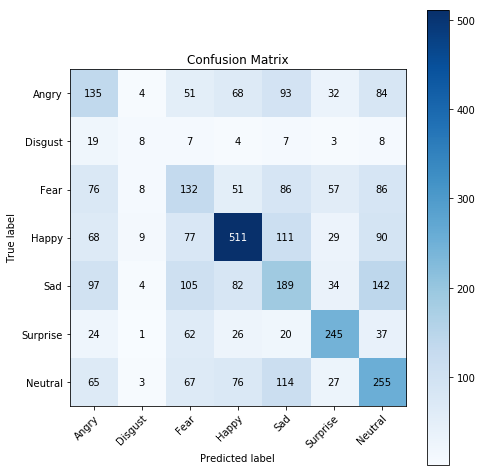

In [26]:
#visualize confusion Matrix
fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
       xticklabels=labels, yticklabels=labels,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

In [33]:
epoch_n=30#opmitized according to val accuracy
#epoch_n=80# opmitized according to F1 score
model_name_ = f'cnn_simple_reduced_{learning_rate}_{batch_size}_{n_epochs}_{n_classes}_epoch{epoch_n}'
model_ = m_importer.load_nn_model(model_name_)

['cnn_simple_reduced_0.0001_32_100_7_epoch30', 1, 7, [48, 48], 15, 2]
load model CnnSimple(
  (drop_hidden): Dropout(p=0.5)
  (drop_visible): Dropout(p=0.2)
  (conv1): Conv2d(1, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8640, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=7, bias=True)
)


In [34]:
y_pred_prob_ = model_(X_test)

In [35]:
y_pred_ = y_pred_prob_.argmax(1)

In [36]:
accuracy_soft_ = (y_pred_ == y_test).float().mean()
accuracy_soft_

tensor(0.4143)

In [37]:
cm_ = metrics.confusion_matrix(y_test, y_pred_, labels_num)
cm_

array([[126,   0,  38, 115,  84,  16,  88],
       [ 23,   0,   7,   9,   8,   0,   9],
       [ 76,   0, 107,  94,  83,  37,  99],
       [ 70,   0,  33, 627,  72,  14,  79],
       [111,   0,  59, 140, 178,  11, 154],
       [ 40,   0,  59,  48,  28, 198,  42],
       [ 81,   0,  40, 120, 102,  13, 251]])

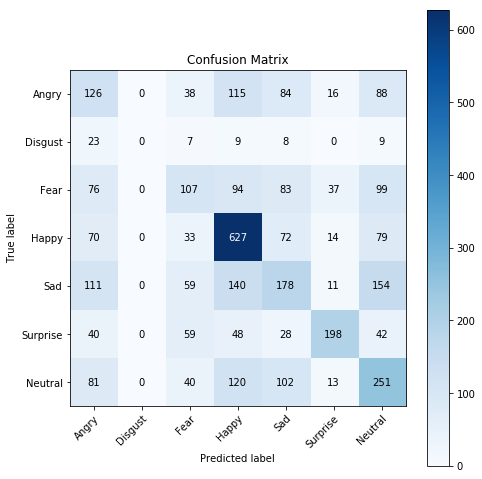

In [38]:
#visualize confusion Matrix
fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(cm_, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm_.shape[1]),
       yticks=np.arange(cm_.shape[0]),
        # ... and label them with the respective list entries
       xticklabels=labels, yticklabels=labels,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cm_.max() / 2.
for i in range(cm_.shape[0]):
    for j in range(cm_.shape[1]):
        ax.text(j, i, cm_[i, j],
        ha="center", va="center",
        color="white" if cm_[i, j] > thresh else "black")
fig.tight_layout()